In [52]:
from models import *
from utilityFunctions import *
from pylab import *
from sklearn.datasets import fetch_mldata
from sklearn import preprocessing
%matplotlib inline

In [5]:
mnist = fetch_mldata('MNIST original')

mnist.data.shape
mnist.target.shape
np.unique(mnist.target)
n = mnist.data.shape[1]

lb = preprocessing.LabelBinarizer()
lb.fit(np.arange(10))

ds = np.concatenate((mnist.data, lb.transform(mnist.target)), axis = 1)

np.random.shuffle(ds)

xy_train = ds[:5000]
xy_vc = ds[50000:60000]
xy_test = ds[60000:]

x_cv = xy_vc[:, :n]
y_cv = xy_vc[:, n:]
xy_vc.shape, x_cv.shape, y_cv.shape

((10000, 794), (10000, 784), (10000, 10))

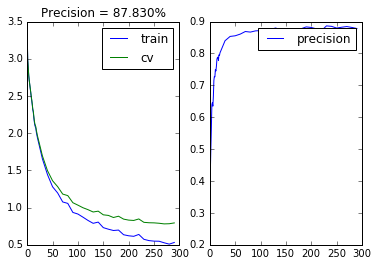

290#: train = 0.531 cv = 0.794 prec 87.830


In [72]:
from IPython.display import clear_output
nn = NN((n, 30, 10), crossEntropy, sigmoid)

noE = 300
epoh = []
c_train = []
c_cv = []
precision = []

def plot():
    global epoh, c_train, c_cv, precision
    plt.subplot(121)
    plt.plot(epoh, c_train, label="train")
    plt.plot(epoh, c_cv, label="cv")
    plt.title("Precision = %.3f%%" % (precision[-1] * 100))
    plt.legend()
    plt.subplot(122)
    plt.plot(epoh, precision, label = "precision")
    plt.legend()
    plt.show()

for i in range(noE):
    nn.trainJoinedData(xy_train, n, 50, 0.01)
    if i % 10 == 0 or i < 20:
        clear_output(True)
        epoh.append(i)
        c_train.append(nn.avgCost(xy_train[:, :n], xy_train[:, n:]))
        c_cv.append(nn.avgCost(x_cv, y_cv))
        a_cv = nn.ff(x_cv)
        tf = np.argmax(a_cv, axis = 1) == np.argmax(y_cv, axis = 1)
        precision.append(np.sum(tf) / len(tf))
        plot()
        print ("{0:2d}#: train = {1:.3f} cv = {2:.3f} prec {3:.3f}".format(i, c_train[-1], c_cv[-1], 100 * precision[-1]))
